In [ ]:
#Libraries
#File upload handler
from google.colab import files
#Zip file handler
import zipfile
import numpy as np
#Operating system related
import os
#Train & test data split
from sklearn.model_selection import train_test_split
#Accuracy evaluation
from sklearn.metrics import accuracy_score
#Image processing
import cv2
#CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#SVM
from sklearn import svm
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
# Upload the zip file
uploaded = files.upload()

NameError: name 'files' is not defined

In [ ]:
# Extract the zip file
with zipfile.ZipFile('archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [ ]:
# Define the list of race labels
race_labels = ['Caucasian', 'Mongoloid', 'Negroid']

In [ ]:
# Load and preprocess the training dataset
train_data = []
train_labels = []

In [ ]:
# Helper function to check file extension
def is_file_extension(file_name, extension):
    file_extension = os.path.splitext(file_name)[1]
    return file_extension == extension

In [ ]:
for race_index, race_label in enumerate(race_labels):
    race_folder = 'data_folder/Racist/Train/' + race_label + '/'
    image_files = os.listdir(race_folder)
    for image_file in image_files:
      if is_file_extension(image_file, ".jpg"):
          image_path = os.path.join(race_folder, image_file)
          image = cv2.imread(image_path)
          image = cv2.resize(image, (128, 128))
          train_data.append(image)
          train_labels.append(race_index)

In [ ]:
# process train data & labels
train_data = np.array(train_data, dtype="float") / 255.0
train_labels = to_categorical(train_labels)

In [ ]:
# Load and preprocess the training dataset
test_data = []
test_labels = []

In [ ]:
for race_index, race_label in enumerate(race_labels):
    race_folder = 'data_folder/Racist/Test/' + race_label + '/'
    image_files = os.listdir(race_folder)
    for image_file in image_files:
        if is_file_extension(image_file, ".jpg"):
            image_path = os.path.join(race_folder, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (128, 128))
            test_data.append(image)
            test_labels.append(race_index)

In [ ]:
# Load an prepocess the testing dataset
test_data = np.array(test_data, dtype="float") / 255.0
test_labels = to_categorical(test_labels)

In [ ]:
# Split the training dataset into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [ ]:
# Data augmentation for the training set
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
datagen.fit(train_data)

#**CNN MODEL**

In [ ]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Modify the number of classes accordingly

In [ ]:
 # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
model.fit(datagen.flow(train_data, train_labels, batch_size=32), epochs=10, validation_data=(val_data, val_labels))

# Evaluate the model on the test set
loss, accuracy, Precision, Recall = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {Precision:.4f}')
print(f'Test Recall: {Recall:.4f}')

Epoch 1/10
31/31 [==============================] - 48s 1s/step - loss: 1.0660 - accuracy: 0.4477 - precision: 0.5325 - recall: 0.1762 - val_loss: 1.0547 - val_accuracy: 0.4590 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 45s 1s/step - loss: 1.0020 - accuracy: 0.4846 - precision: 0.6429 - recall: 0.1936 - val_loss: 0.8924 - val_accuracy: 0.5369 - val_precision: 0.6822 - val_recall: 0.2992
Epoch 3/10
31/31 [==============================] - 45s 1s/step - loss: 0.8737 - accuracy: 0.5820 - precision: 0.7078 - recall: 0.3822 - val_loss: 0.6936 - val_accuracy: 0.7131 - val_precision: 0.7828 - val_recall: 0.6352
Epoch 4/10
31/31 [==============================] - 46s 1s/step - loss: 0.7147 - accuracy: 0.6895 - precision: 0.7494 - recall: 0.6342 - val_loss: 0.6347 - val_accuracy: 0.7418 - val_precision: 0.7895 - val_recall: 0.6762
Epoch 5/10
31/31 [==============================] - 45s 1s/step - loss: 0.6703 - accuracy: 0.7111 - prec

# CNN Testing


In [ ]:
# Upload an image file
uploaded_file = files.upload()

# Load the uploaded image
for file_name in uploaded_file.keys():
    image_path = file_name
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    input_data = np.array([image], dtype="float") / 255.0

# Make predictions on the uploaded image
predictions = model.predict(input_data)
predicted_class = np.argmax(predictions[0])
predicted_label = race_labels[predicted_class]

# Print the predicted label
print("Predicted label:", predicted_label)

NameError: ignored

1/1 [==============================] - 0s 187ms/step


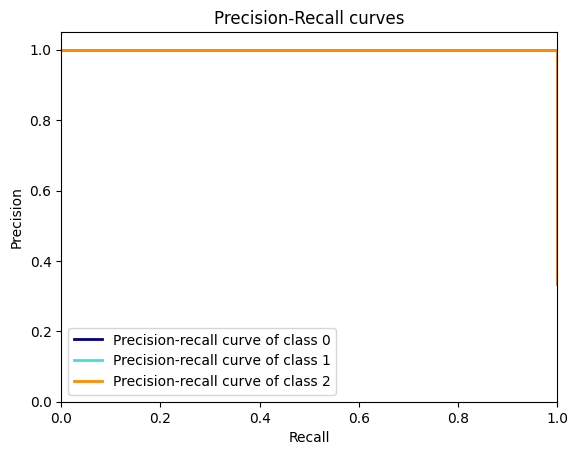

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from itertools import cycle

y_pred_probs = model.predict(val_data)

precision = dict()
recall = dict()
for class_idx in range(3):  # Replace 3 with the actual number of classes
    precision[class_idx], recall[class_idx], _ = precision_recall_curve(val_labels[:, class_idx], predictions[:, class_idx])

plt.figure()
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])  # Add more colors as needed
for class_idx, color in zip(range(3), colors):
    plt.plot(recall[class_idx], precision[class_idx], color=color, lw=2,
             label='Precision-recall curve of class {}'.format(class_idx))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curves')
plt.legend(loc='lower left')  # Add labels to the legend
plt.show()



# SVM Model

In [ ]:
# Load and preprocess the data
data_folder = 'data_folder/Racist/Train/'
images = []
labels = []

In [ ]:
for race_label in race_labels:
    folder_path = os.path.join(data_folder, race_label)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(race_labels.index(race_label))

In [ ]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [ ]:
# Create an SVM classifier
clf = svm.SVC(probability=True)

# Train the SVM classifier
clf.fit(X_train, y_train)
support_vectors = clf.support_vectors_
num_support_vectors = len(support_vectors)
print("Number of support vectors:", num_support_vectors)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Number of support vectors: 776
Accuracy: 0.7868852459016393


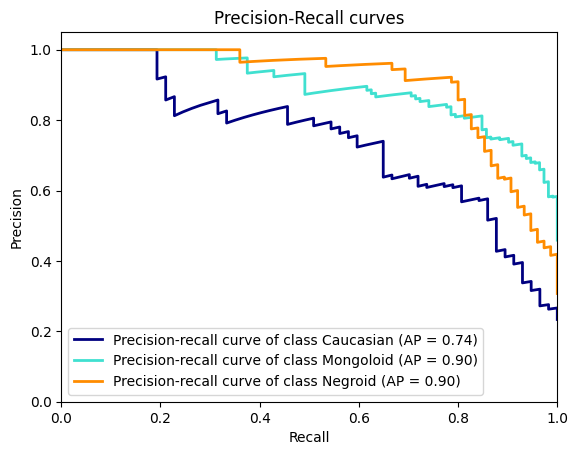

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

# Compute average precision and precision-recall curves for each class
precision = dict()
recall = dict()
average_precision = dict()

for class_idx in range(len(race_labels)):
    precision[class_idx], recall[class_idx], _ = precision_recall_curve(
        y_test == class_idx, y_scores[:, class_idx])
    average_precision[class_idx] = average_precision_score(y_test == class_idx, y_scores[:, class_idx])

# Plot precision-recall curves for each class
plt.figure()
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for class_idx, color in zip(range(len(race_labels)), colors):
    plt.plot(recall[class_idx], precision[class_idx], color=color, lw=2,
             label='Precision-recall curve of class {} (AP = {:.2f})'.format(race_labels[class_idx], average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curves')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# precision for test data predictions
from sklearn.metrics import precision_score

precision_test = precision_score(y_test, y_pred, average="macro")
print('Test data Precision =', precision_test)

Test data Precision = 0.7875605566584039


In [ ]:
# recall for test data predictions
from sklearn.metrics import recall_score

recall_test = recall_score(y_test, y_pred, average="macro")
print('Test data Recall =', recall_test)

Test data Recall = 0.5742314118629909


In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, sample_weight=None, normalize=None)

array([[37, 17,  3],
       [36, 62, 14],
       [22, 14, 39]])

# SVM Testing

In [ ]:
# Function to classify an image using the trained model
def classify_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img_flattened = img.reshape(1, -1)

    # Make prediction using the trained SVM model
    prediction = clf.predict(img_flattened)[0]
    race_label = race_labels[prediction]

    return race_label

# Upload and classify an image
uploaded_file = files.upload()

# Load the uploaded image
for file_name in uploaded_file.keys():
    image_path = file_name
    predicted_label = classify_image(image_path)

# Print the predicted label
print("Predicted label:", predicted_label)

Saving 25.JPG to 25 (1).JPG
Predicted label: Mongoloid


# KNN Model


In [ ]:
# Flatten the image data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flattened, y_train)
y_scores = knn.predict_proba(X_test_flattened)

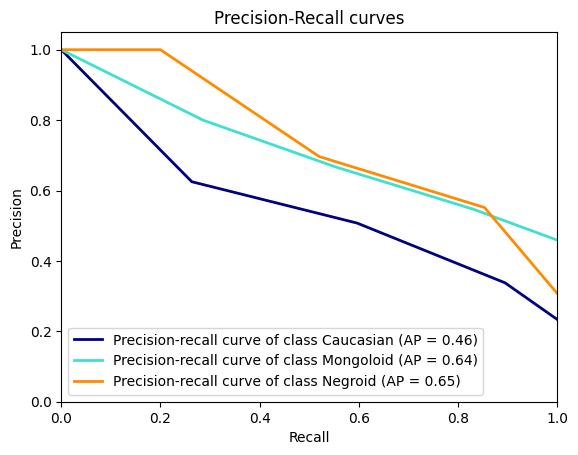

In [ ]:

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

# Compute average precision and precision-recall curves for each class
precision = dict()
recall = dict()
average_precision = dict()

for class_idx in range(len(race_labels)):
    precision[class_idx], recall[class_idx], _ = precision_recall_curve(
        y_test == class_idx, y_scores[:, class_idx])
    average_precision[class_idx] = average_precision_score(y_test == class_idx, y_scores[:, class_idx])

# Plot precision-recall curves for each class
plt.figure()
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for class_idx, color in zip(range(len(race_labels)), colors):
    plt.plot(recall[class_idx], precision[class_idx], color=color, lw=2,
             label='Precision-recall curve of class {} (AP = {:.2f})'.format(race_labels[class_idx], average_precision[class_idx]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curves')
plt.legend(loc='lower left')
plt.show()


In [ ]:
# Evaluate the model on the testing set
accuracy = knn.score(X_test_flattened, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5655737704918032


In [ ]:
# precision for test data predictions
from sklearn.metrics import precision_score
y_pred = knn.predict(X_test_flattened)
precision_test = precision_score(y_test, y_pred, average="macro")
print('Test data Precision =', precision_test)

Test data Precision = 0.5841896407685881


In [ ]:
# recall for test data predictions
from sklearn.metrics import recall_score

recall_test = recall_score(y_test, y_pred, average="macro")
print('Test data Recall =', recall_test)

Test data Recall = 0.5742314118629909


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, sample_weight=None, normalize=None)

array([[37, 17,  3],
       [36, 62, 14],
       [22, 14, 39]])

# KNN Testing

In [ ]:
# Function to classify an image using the trained model
def classify_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img_flattened = img.reshape(1, -1)

    # Make prediction using the trained KNN model
    prediction = knn.predict(img_flattened)[0]
    race_label = race_labels[prediction]

    return race_label

# Upload and classify an image
uploaded_file = files.upload()

# Load the uploaded image
for file_name in uploaded_file.keys():
    image_path = file_name
    predicted_label = classify_image(image_path)

# Print the predicted label
print("Predicted label:", predicted_label)

Saving 68.JPG to 68.JPG
Predicted label: Caucasian
